<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>

# **HR Attrition**

In [89]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats


############################################ FEATURE SELECTION ############################################
!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
!pip install pydotplus
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import brier_score_loss

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **1. EDA - Exploratory Data Analysis** </font></a>


<a class="anchor" id="2nd-bullet">
<font color = '#2f4bd6ff'>
    
## **1.1. Data Upload** </font></a>


In section 1.1 we import the database "HR_Attrition_Dataset.csv".

In [90]:
df = pd.read_csv("HR_Attrition_Dataset.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.2 Initial characterization of the database** </font></a>

The database has a size of 1,470 rows and 35 columns, with no duplicate records identified. Regarding the types of variables, it was found that the dataset is composed of 35 variables, of which 9 are categorical and 26 are numerical.

The target variable is “Attrition”.

In [91]:
# Describe dataset structure
df.shape

(1470, 35)

In [92]:
# Verify the existance of null-values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null-values

In [93]:
# Verify the existance of duplicate values
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


There are no duplicate values

In [94]:
# Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [95]:
#Set Index
df.set_index(keys=df['EmployeeNumber'],inplace=True)

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **1.3  Basic exploration of the Data Frame and initial preprocessing** </font></a>

An initial exploration of the training data was carried out with the aim of obtaining an overall view of the dataset’s contents and identifying any potential preprocessing needs.
This step was essential to understand the data structure and to detect inconsistencies, missing values, or duplicates that could compromise the quality of the subsequent analysis.

In [96]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [97]:
#Analyze the main statistics of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [98]:
#Analyze the main statistics of the categorical variables
df.describe(include=['object']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


'EmployeeCount' is always = 1 (std = 0) - remove

'StandardHours' is always = 80 (std = 0) - remove

'Over18' is always =1 - remove

In [99]:
# Drop Columns
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18']
df.drop(columns=cols_to_drop, inplace=True)

df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [100]:
# Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols


Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [101]:
# Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [102]:
# Observe Unique Values
# List of columns
columns = df.columns.tolist()

# Unique Values
for col in columns:
    unique_vals = df[col].unique()
    print(f"{col} → {unique_vals}")


Age → [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition → ['Yes' 'No']
BusinessTravel → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate → [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  

<a class="anchor" id="1st-bullet">
<font color = '#2f4bd6ff'>
    
# **2. Data Splitting: Train / Validation / Test sets** </font></a>

In [103]:

# Copy the cleaned dataset
data_model = df.copy()

# Separate features and target
X = data_model.drop(columns='Attrition')
y = data_model['Attrition'].copy()

# --- Step 1: Split Train (70%) and Temp (30%) ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,        # 30% for validation + test
    random_state=42,
    stratify=y            # maintain class proportions
)

# --- Step 2: Split Temp into Validation (15%) and Test (15%) ---
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,        # 50% of 30% → 15% of total
    random_state=42,
    stratify=y_temp
)

# --- Summary ---
print(f"Training size: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

# --- Check class distribution ---
print("\nTraining Distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation Distribution:")
print(y_val.value_counts(normalize=True) * 100)

print("\nTest Distribution:")
print(y_test.value_counts(normalize=True) * 100)



Training size: 1029 (70.0%)
Validation size: 220 (15.0%)
Test size: 221 (15.0%)

Training Distribution:
Attrition
No     83.867833
Yes    16.132167
Name: proportion, dtype: float64

Validation Distribution:
Attrition
No     84.090909
Yes    15.909091
Name: proportion, dtype: float64

Test Distribution:
Attrition
No     83.710407
Yes    16.289593
Name: proportion, dtype: float64


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **3. Visual Exploration** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.1 Target Variable** </font></a>

In [104]:
#Target Variable Distribution (Training Set)
# Count of each class
count = y_train.value_counts().sort_index()

# Percentage of each class
percent = y_train.value_counts(normalize=True).sort_index() * 100
percent = percent.map('{:,.2f} %'.format)

# Combine count and percentage in a dataframe
df_target = pd.concat([count, percent], axis=1)
df_target.columns = ['Nr of Employees', '%']
display(df_target)




,Nr of Employees,%
Attrition,,
No,863,83.87 %
Yes,166,16.13 %


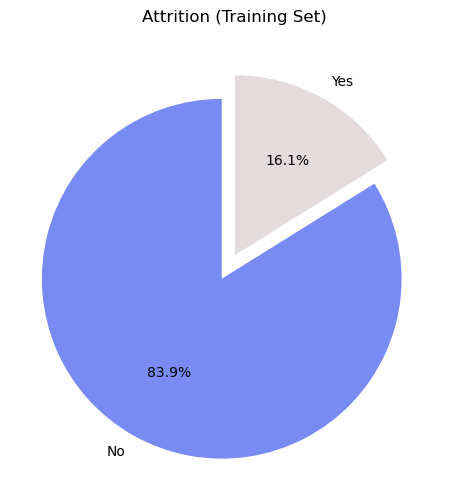

In [105]:

# Pie Chart

plt.figure(figsize=(5,5))
count.plot(
    kind='pie',
    labels=['No', 'Yes'],
    explode=(0.15, 0),
    startangle=90,
    autopct='%1.1f%%',
    colors=["#778bf2ff", "#e4dcdcff"]
)
plt.title("Attrition (Training Set)")
plt.ylabel('')
plt.tight_layout()
plt.show()


Employee Attrition:

    83.87% of employees stayed with the company.

    16.13% of employees left the company.

The dataset is imbalanced toward those who stayed.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.2 Categorical Variables** </font></a>

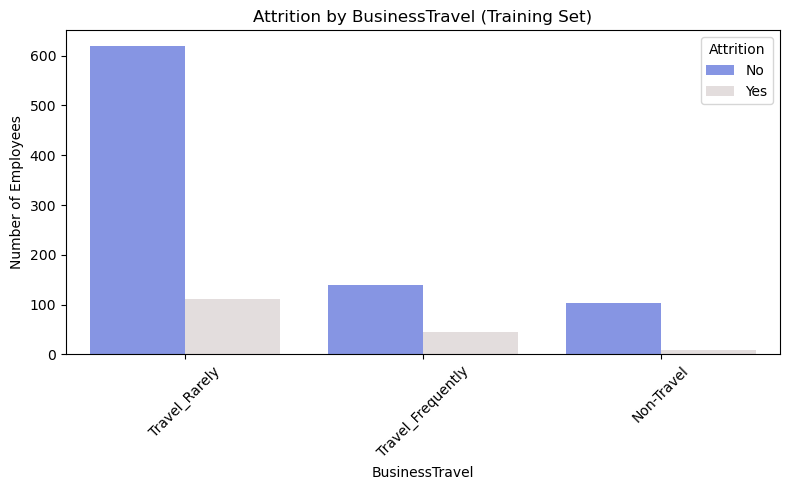

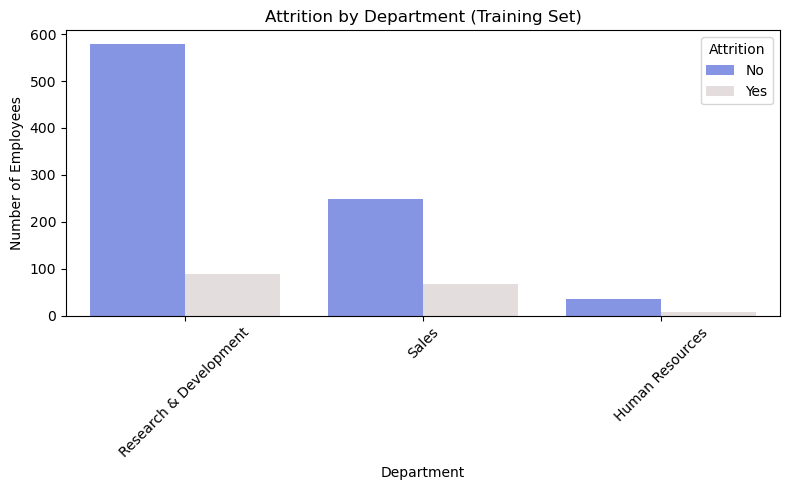

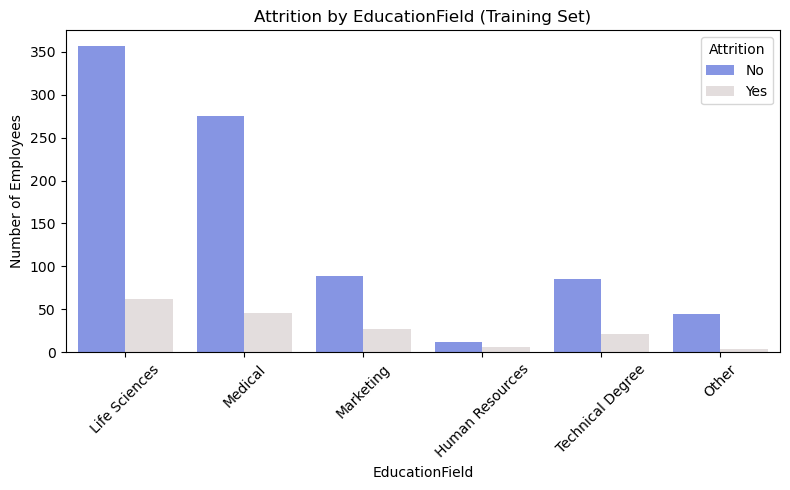

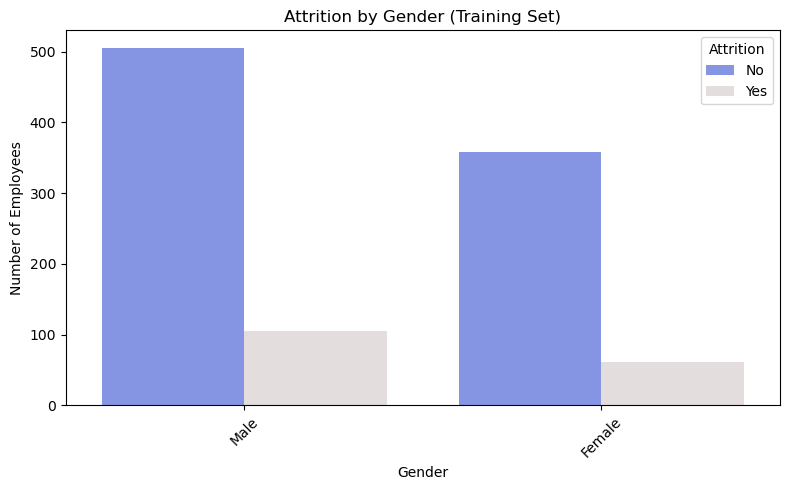

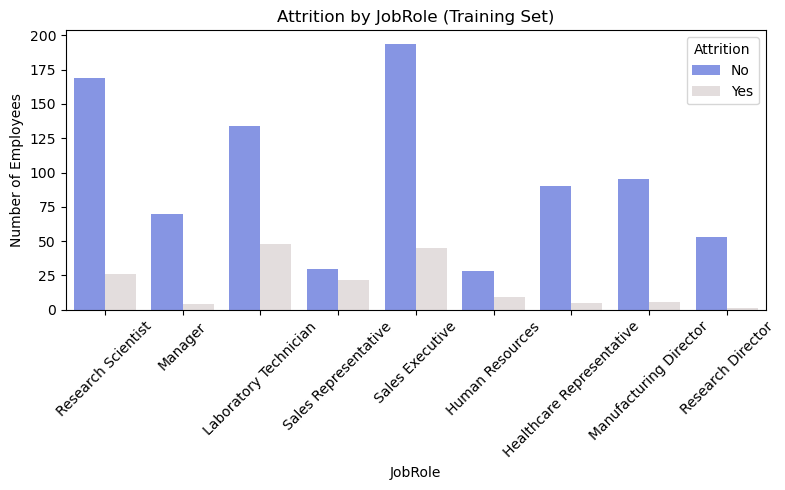

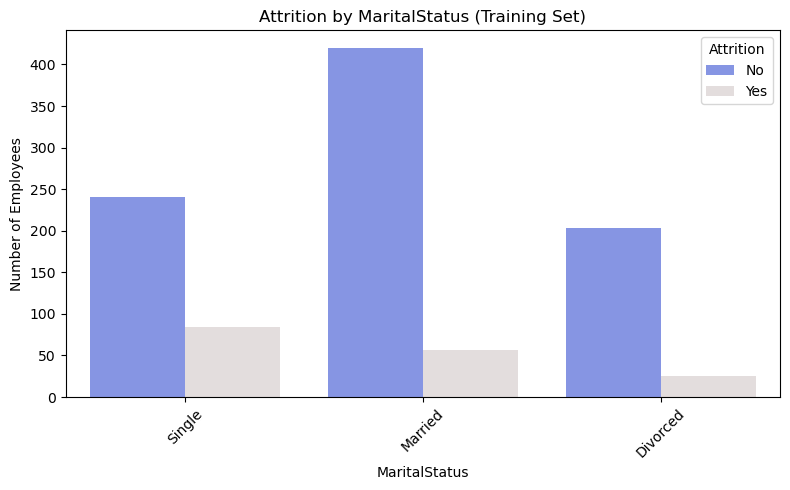

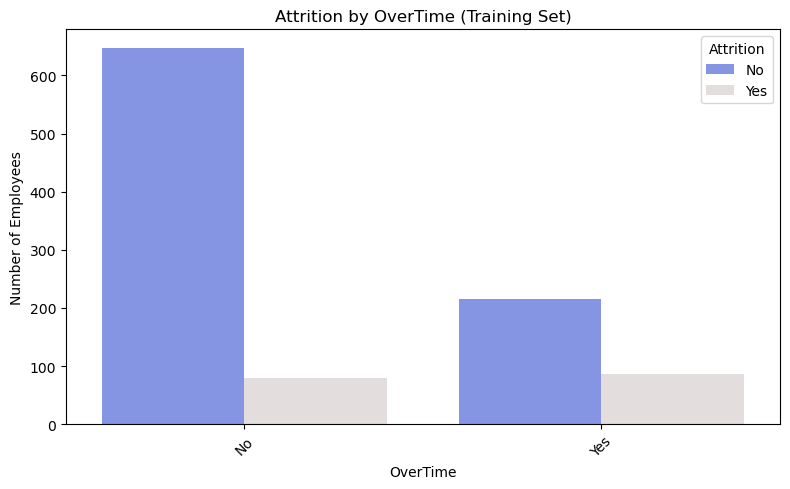

In [106]:

%matplotlib inline

# Categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Palette for original Yes/No target
palette_str = {"No": "#778bf2ff", "Yes": "#e4dcdcff"}

# Plot
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(
        data=X_train.assign(Attrition=y_train),  # target is still 'Yes'/'No'
        x=col,
        hue='Attrition',
        palette=palette_str
    )
    plt.title(f"Attrition by {col} (Training Set)")
    plt.xlabel(col)
    plt.ylabel("Number of Employees")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **2.3 Numerical Variables** </font></a>

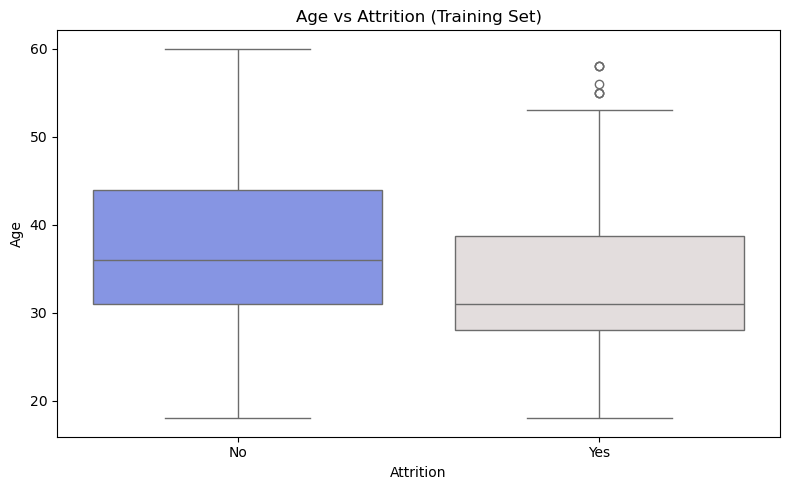

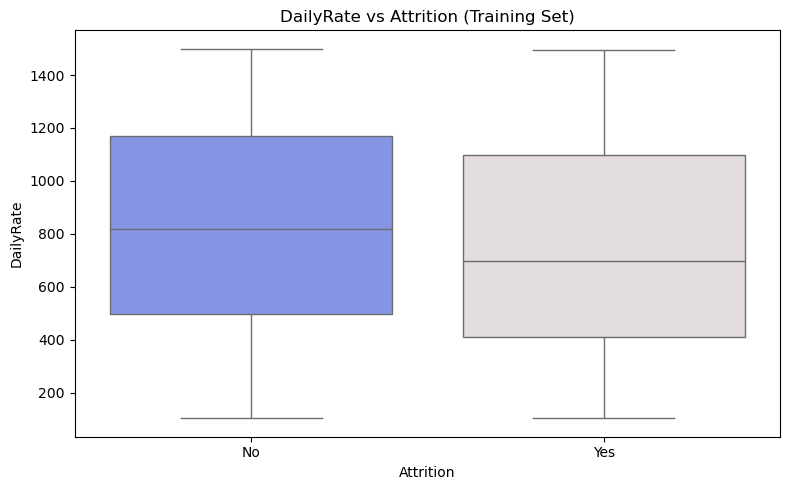

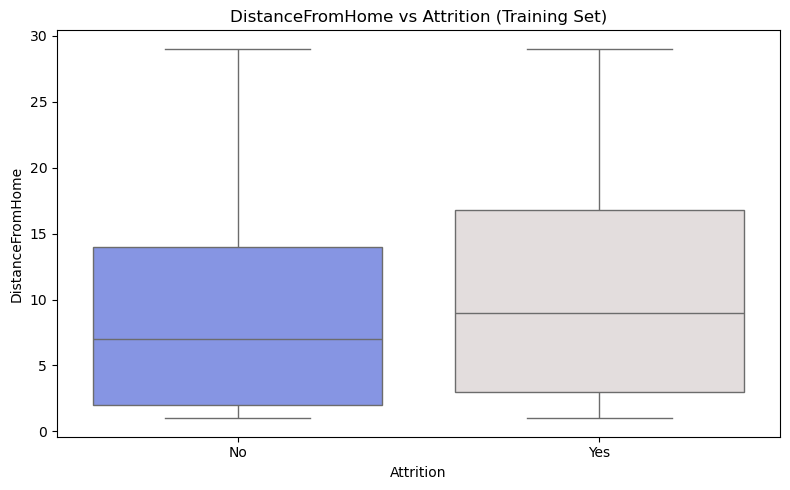

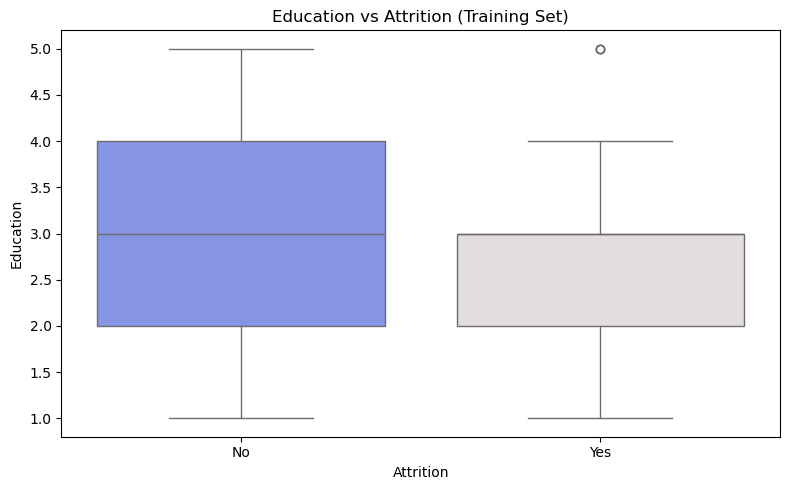

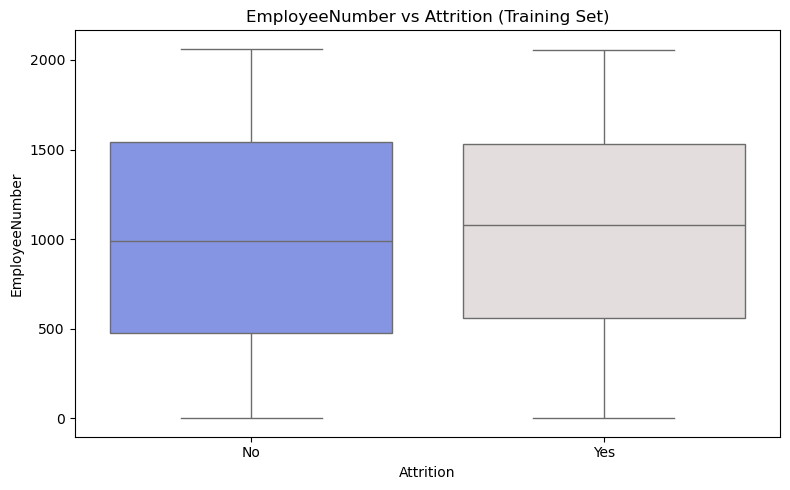

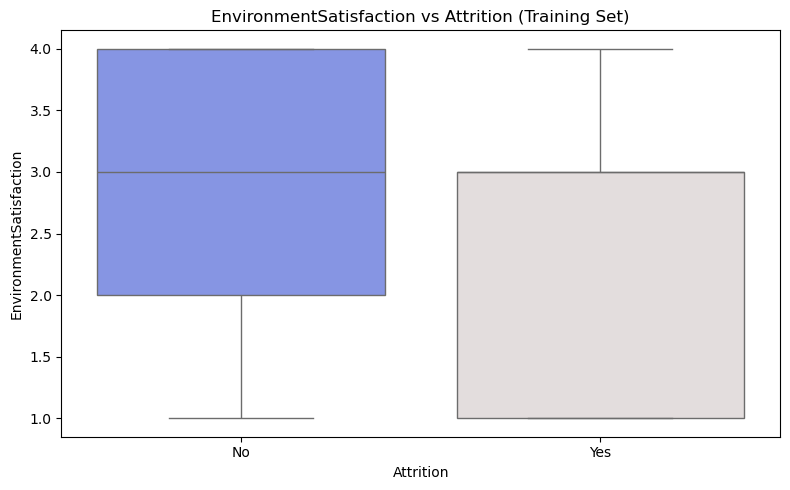

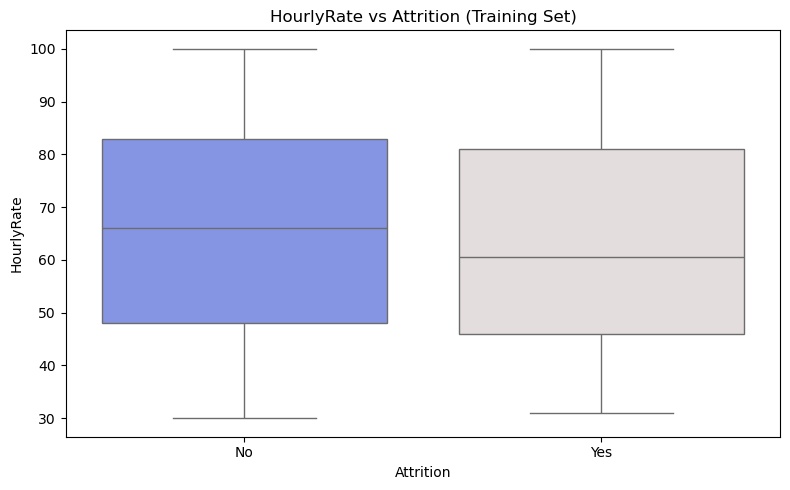

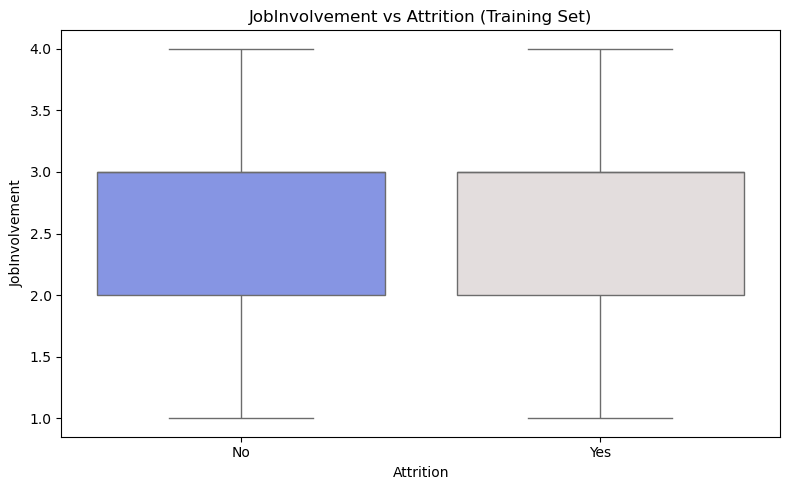

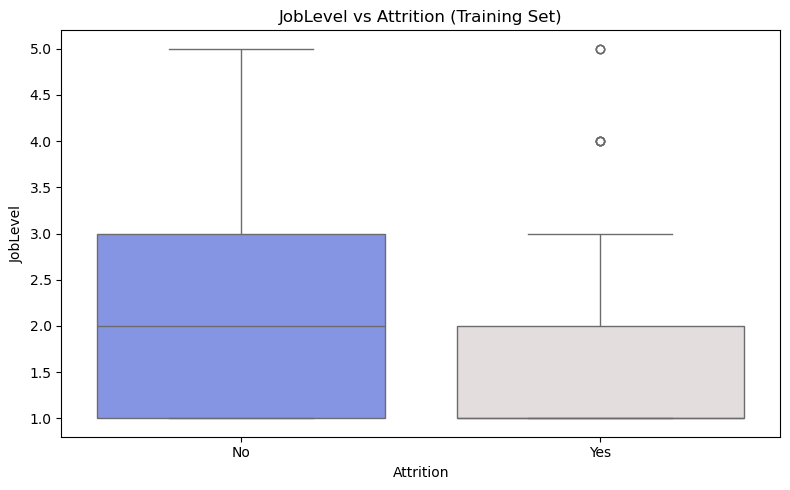

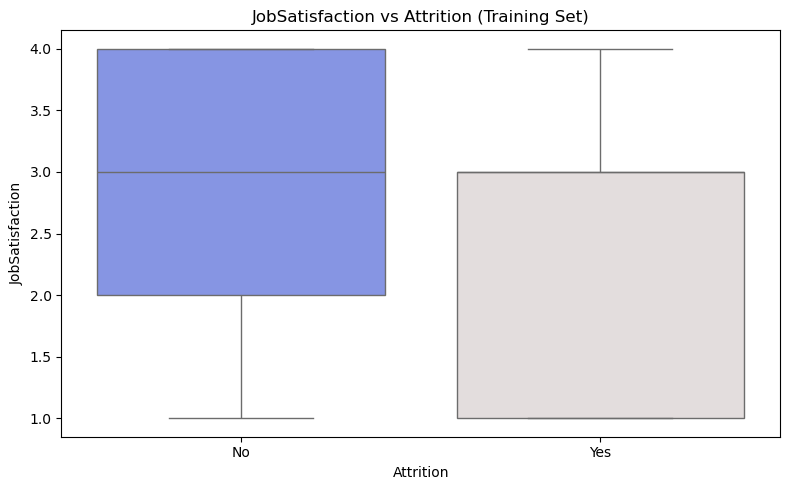

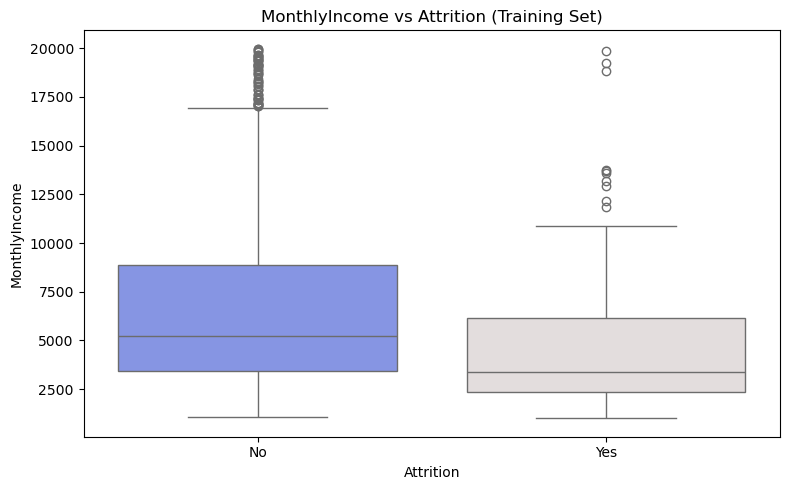

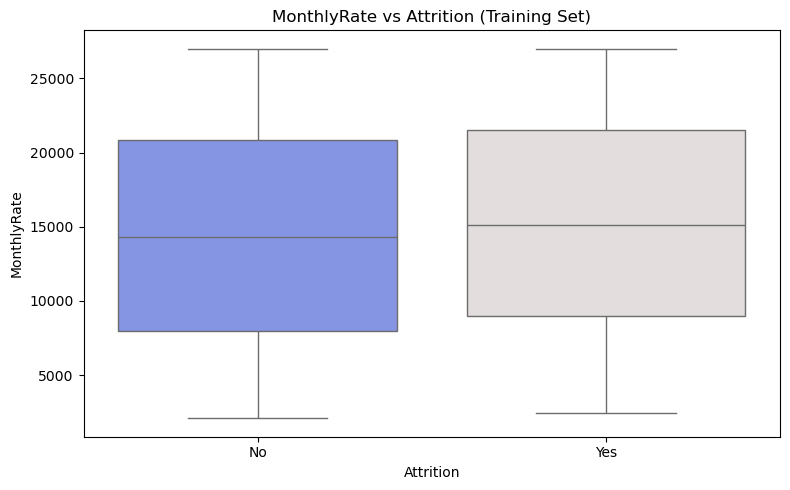

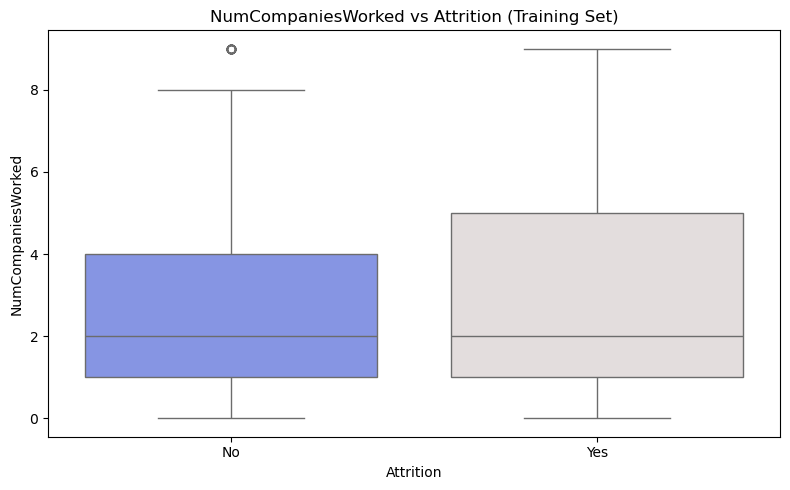

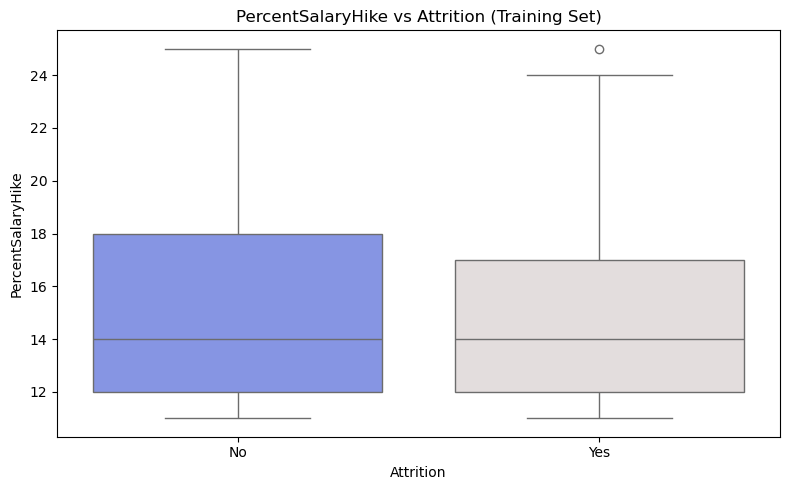

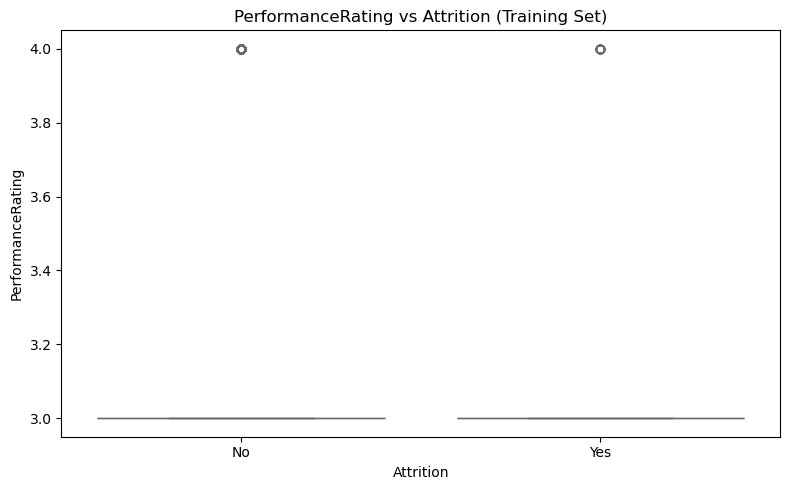

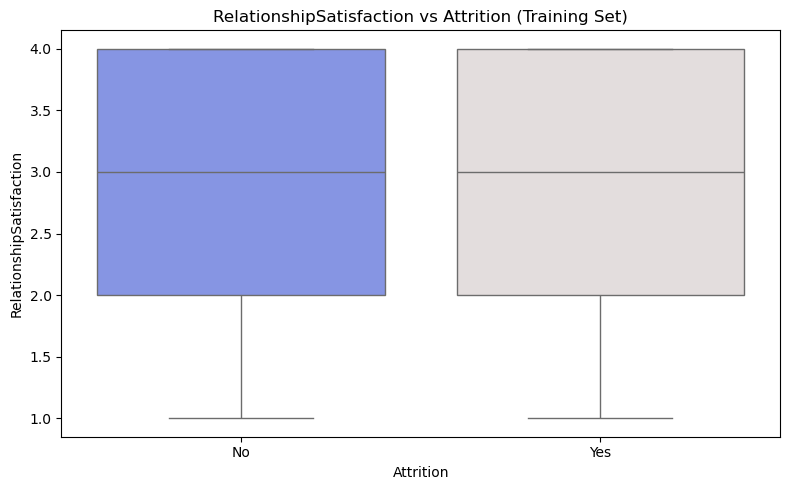

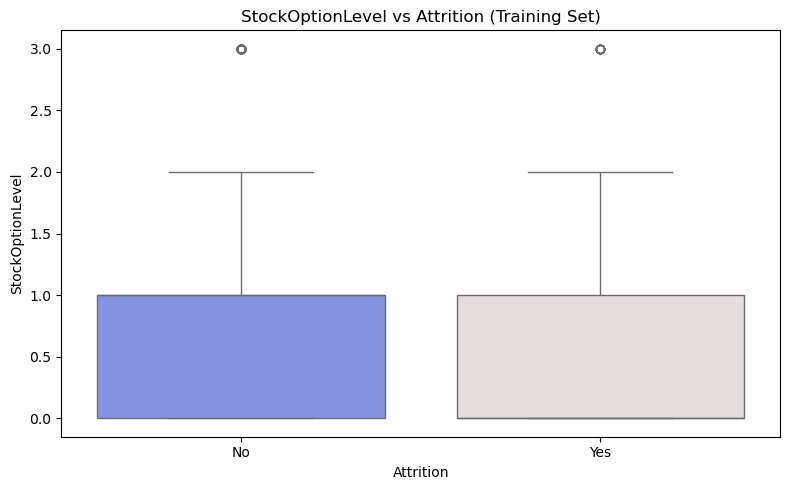

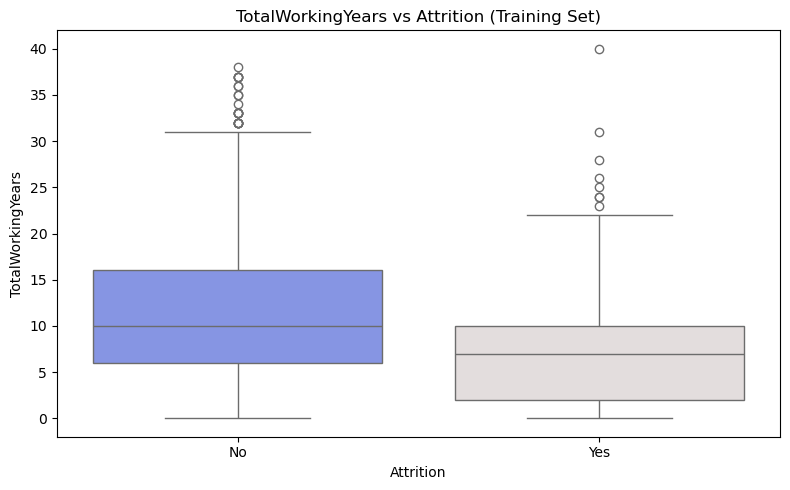

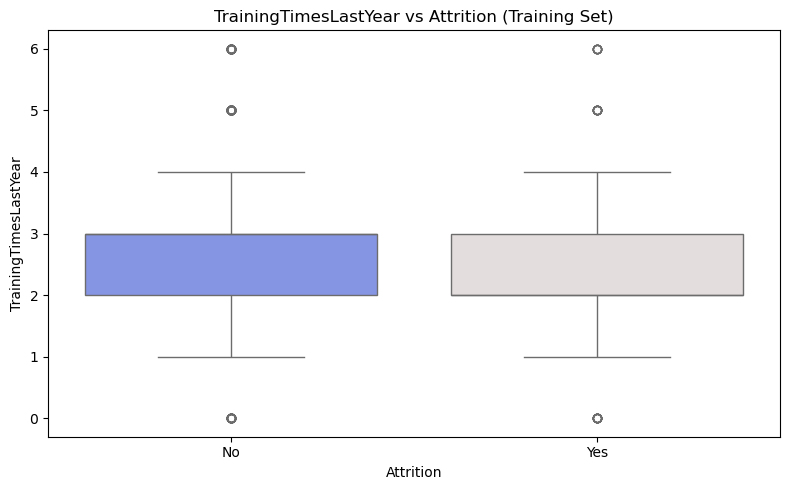

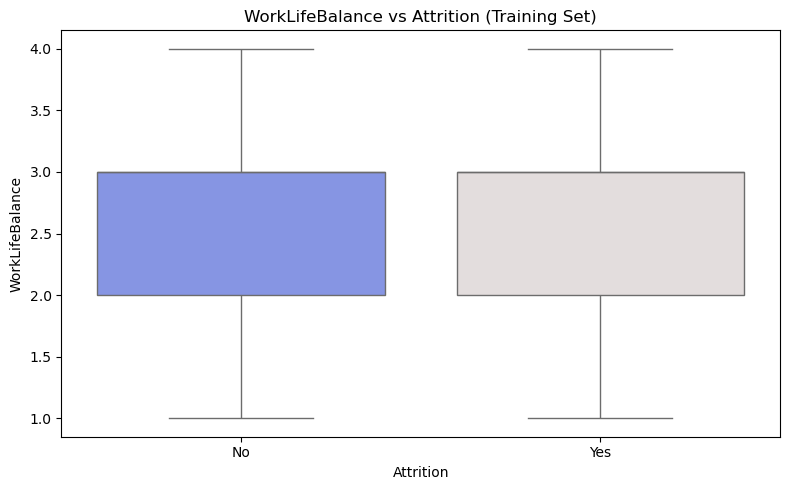

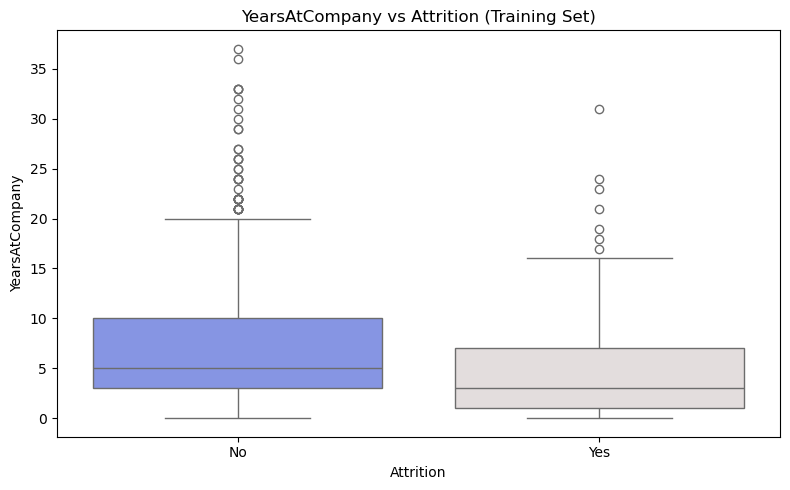

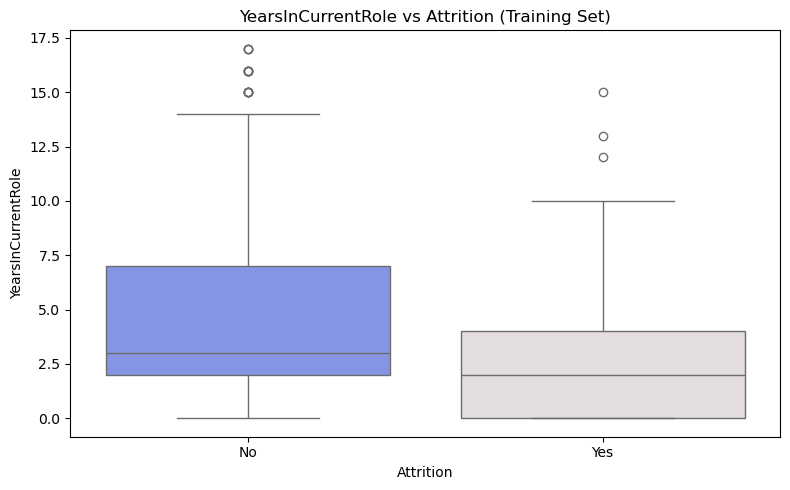

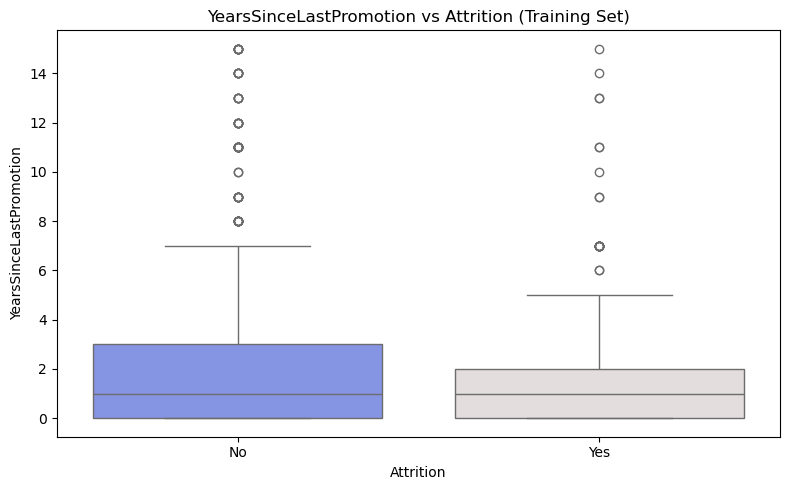

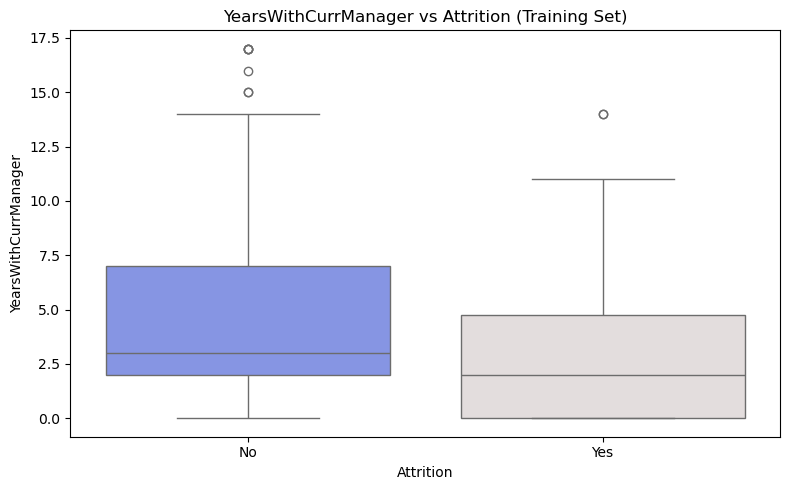

In [107]:
palette_str = {"No": "#778bf2ff", "Yes": "#e4dcdcff"}

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        data=X_train.assign(Attrition=y_train),  # combine features + target
        x="Attrition",
        y=col,
        palette=palette_str
    )
    plt.title(f"{col} vs Attrition (Training Set)")
    plt.xlabel("Attrition")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()





  

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.4 Correlation between Variables: Heatmap** </font></a>

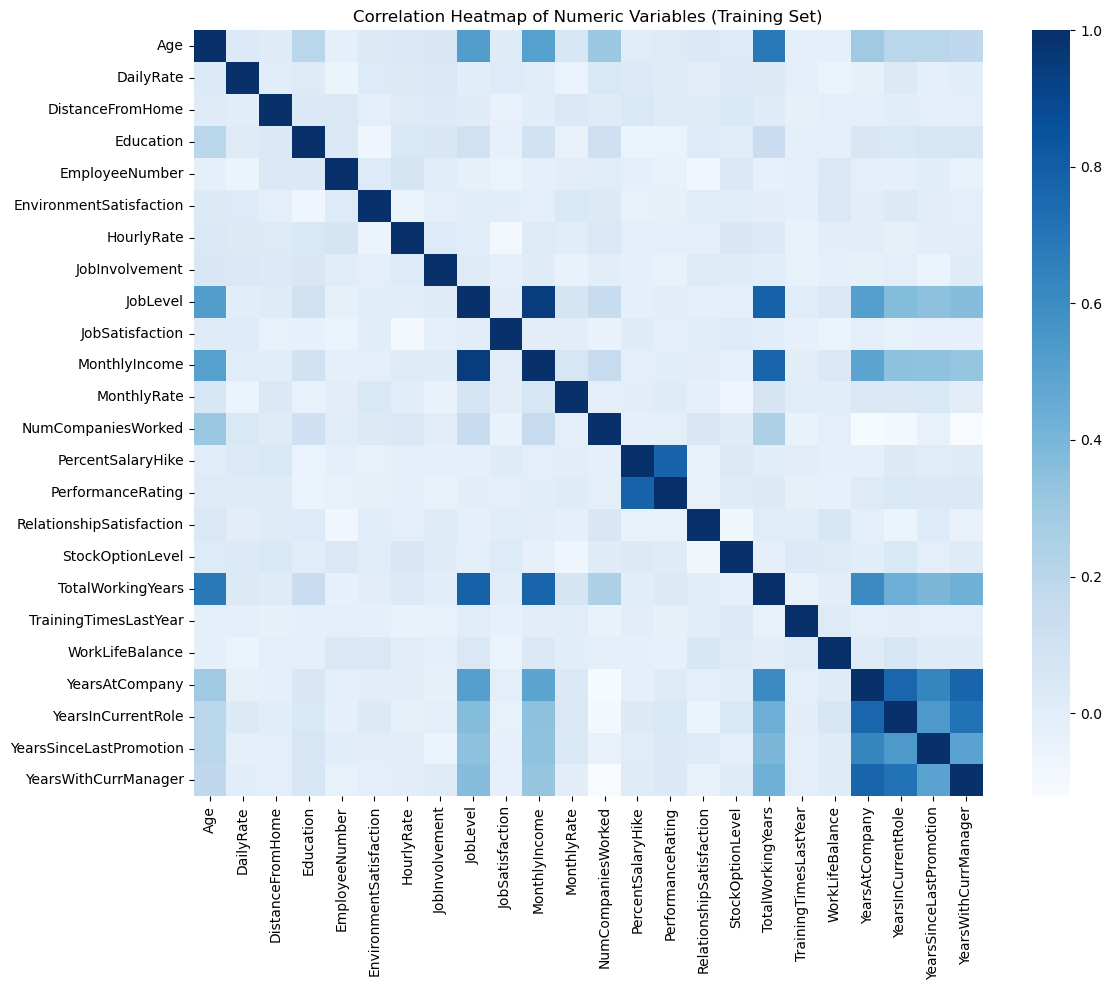

In [108]:
# Pearson Correlation

# Select numeric columns from training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
sns.heatmap(
    X_train[numeric_cols].corr(),  # only training data
    cmap="Blues",
    annot=False
)
plt.title("Correlation Heatmap of Numeric Variables (Training Set)")
plt.tight_layout()
plt.show()


In [109]:
# Compute correlation matrix on numeric columns of training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
corr = X_train[numeric_cols].corr().abs()  # absolute values

# Only keep correlations above threshold but below 1 
threshold = 0.5
strong_corr = corr.where((corr > threshold) & (corr < 1.0)).stack().reset_index()
strong_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(strong_corr)




                 Variable 1               Variable 2  Correlation
0                       Age                 JobLevel     0.524321
1                       Age            MonthlyIncome     0.509772
2                       Age        TotalWorkingYears     0.687911
3                  JobLevel                      Age     0.524321
4                  JobLevel            MonthlyIncome     0.945943
5                  JobLevel        TotalWorkingYears     0.781716
6                  JobLevel           YearsAtCompany     0.514572
7             MonthlyIncome                      Age     0.509772
8             MonthlyIncome                 JobLevel     0.945943
9             MonthlyIncome        TotalWorkingYears     0.769714
10        PercentSalaryHike        PerformanceRating     0.773426
11        PerformanceRating        PercentSalaryHike     0.773426
12        TotalWorkingYears                      Age     0.687911
13        TotalWorkingYears                 JobLevel     0.781716
14        

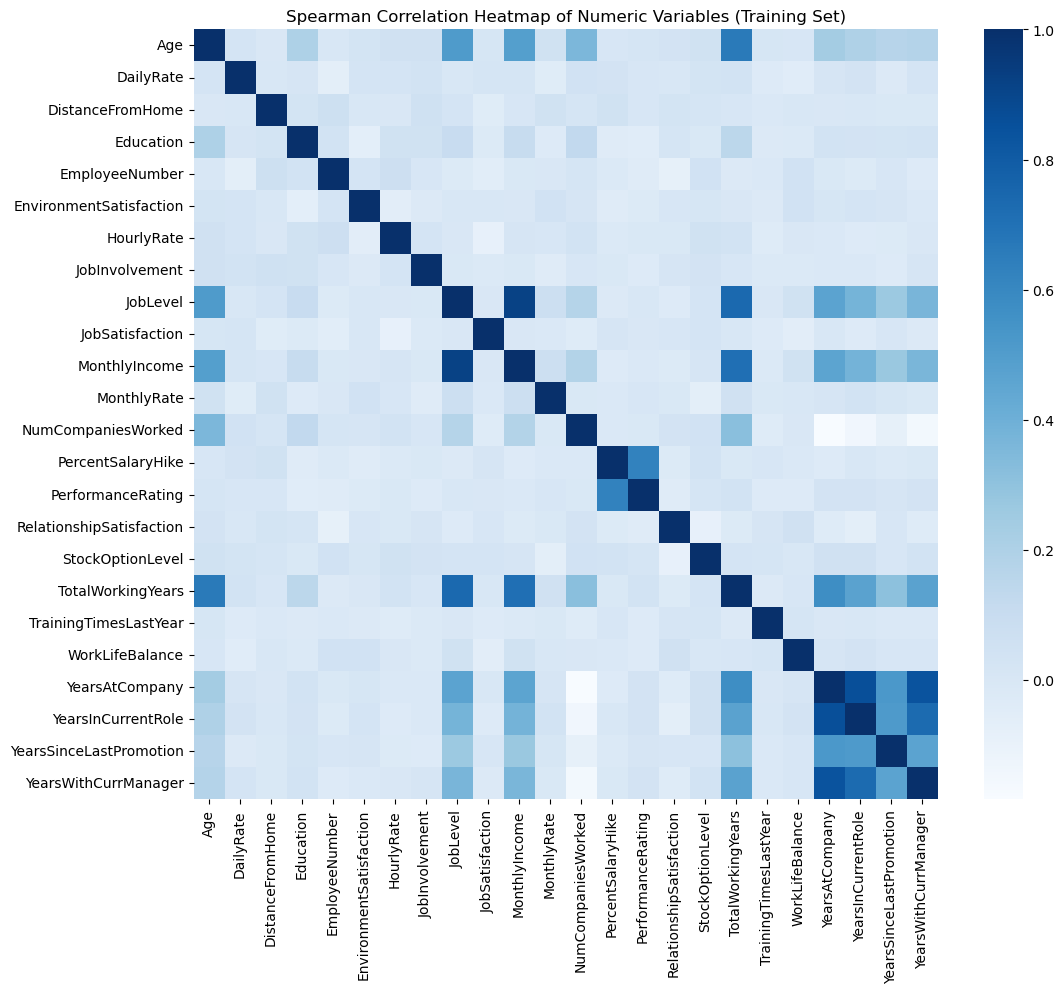

In [110]:
# Spearman correlation on numeric columns of training set
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
spearman_corr = X_train[numeric_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, cmap="Blues", annot=False)
plt.title("Spearman Correlation Heatmap of Numeric Variables (Training Set)")
plt.show()


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **3.5. Outliers** </font></a>

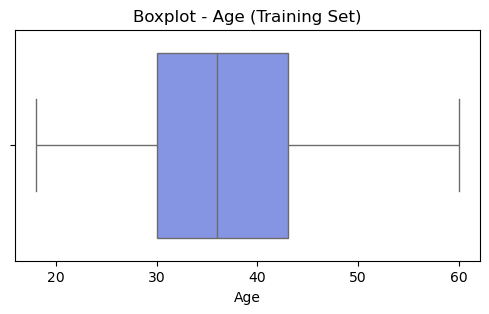

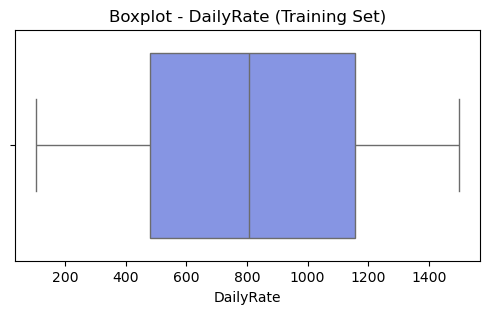

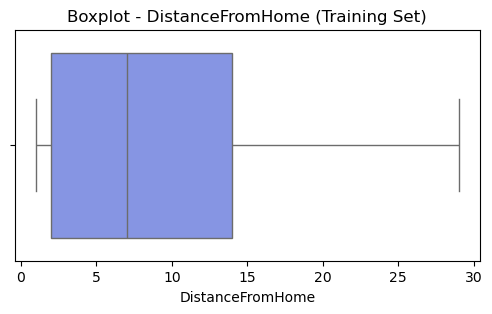

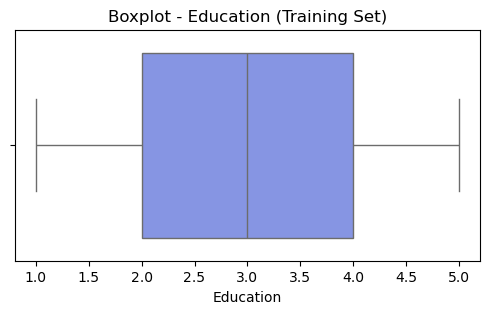

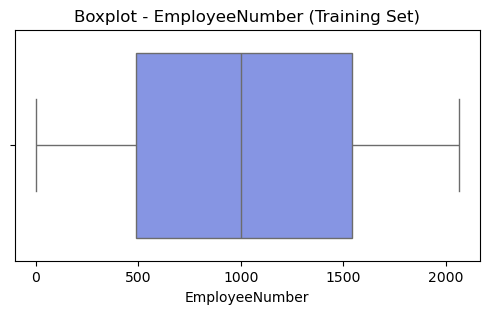

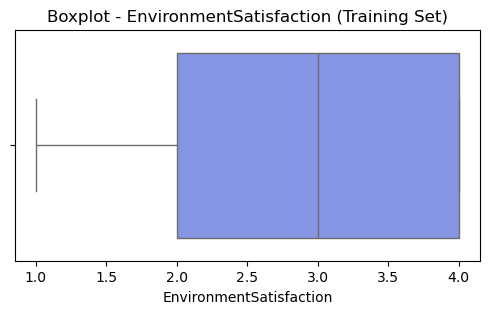

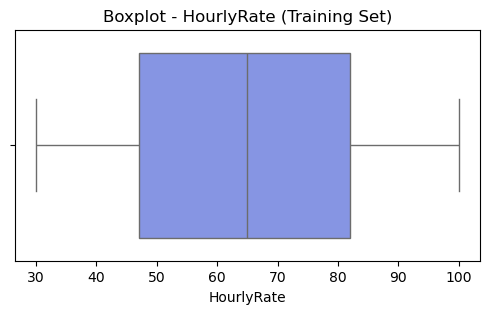

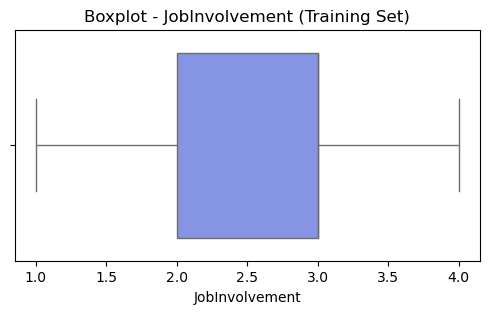

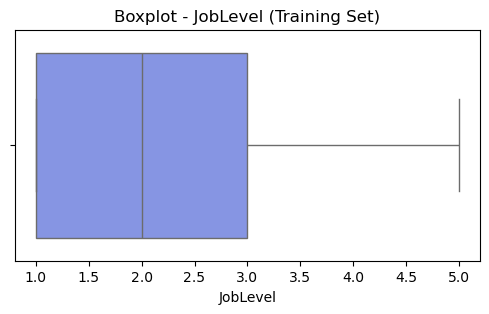

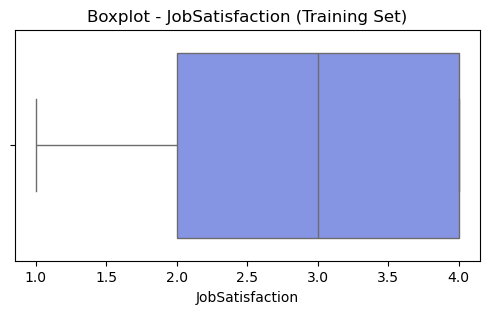

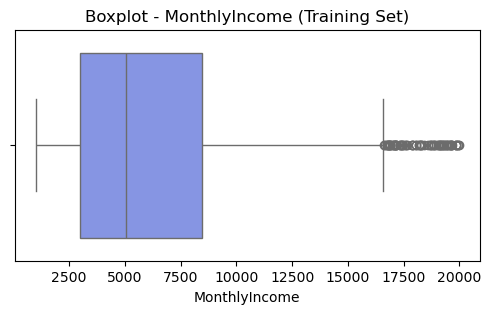

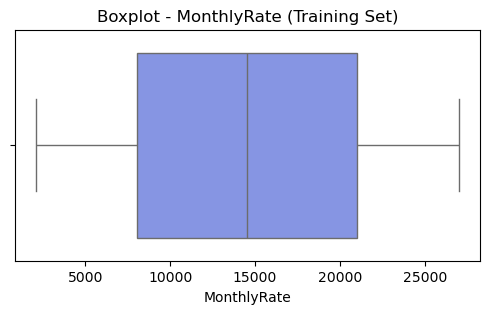

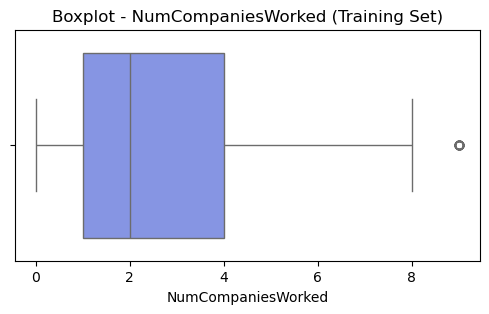

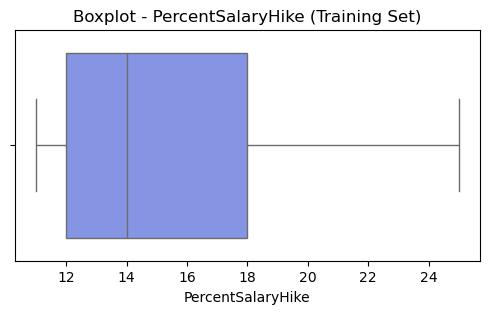

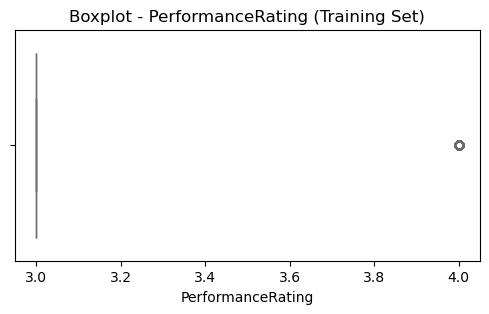

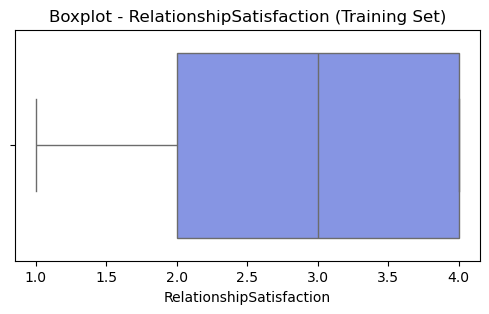

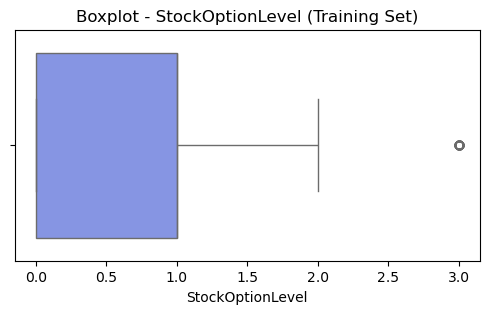

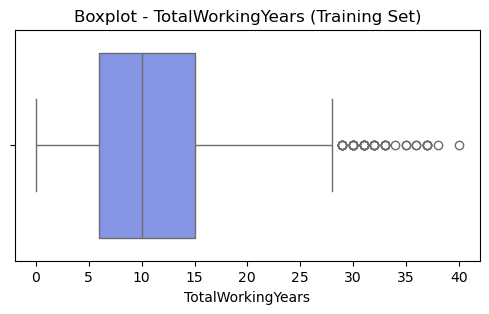

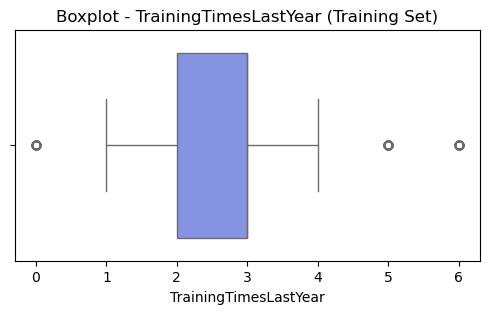

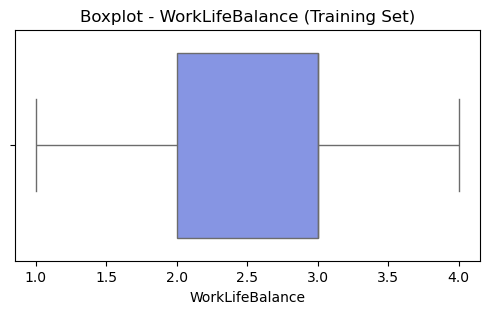

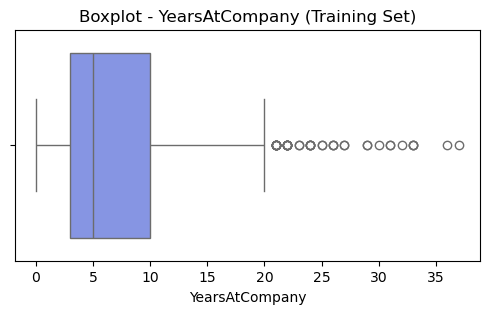

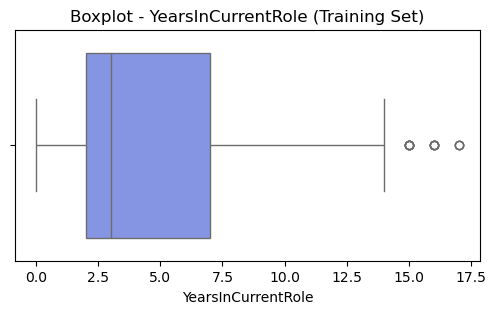

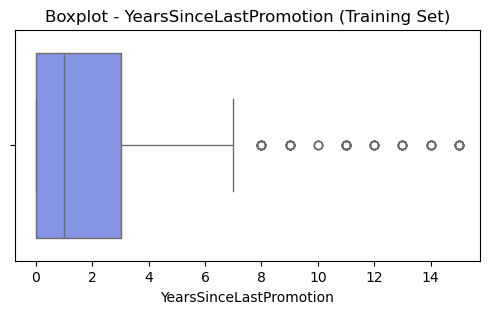

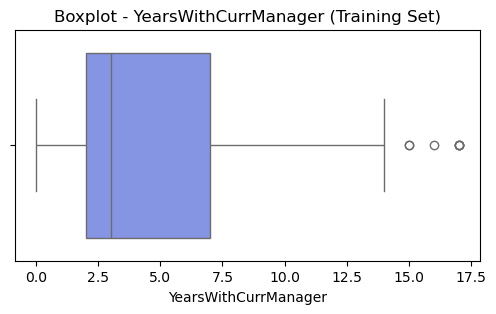

In [111]:
# Outlier detection on training set only
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=X_train[col], color="#778bf2ff")
    plt.title(f'Boxplot - {col} (Training Set)')
    plt.xlabel(col)
    plt.show()



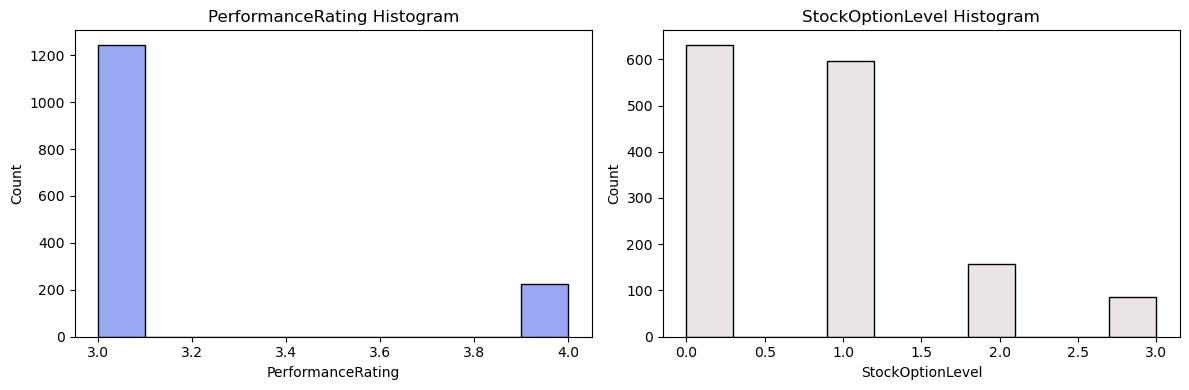

In [112]:
# Histograms for PerformanceRating and StockOptionLevel
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['PerformanceRating'], bins=10, ax=axes[0], color="#778bf2ff")
axes[0].set_title('PerformanceRating Histogram')
sns.histplot(df['StockOptionLevel'], bins=10, ax=axes[1], color ="#e4dcdcff")
axes[1].set_title('StockOptionLevel Histogram')
plt.tight_layout()
plt.show()



In [113]:
# Filter high performers in training set
high_perf_train = X_train[X_train['PerformanceRating'] > 3.8].copy()
high_perf_train['Attrition'] = y_train.loc[high_perf_train.index]

# Remaining employees in training set
rest_train = X_train.drop(high_perf_train.index).copy()
rest_train['Attrition'] = y_train.loc[rest_train.index]

# Columns to compare
cols_compare = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 
                'YearsSinceLastPromotion', 'OverTime']

# Function to summarize statistics
def summarize_stats(data, cols):
    summary = {}
    for col in cols:
        if col != 'OverTime':
            summary[col] = {
                'mean': data[col].mean(),
                'max': data[col].max(),
                'min': data[col].min()
            }
        else:
            # For OverTime, show proportion of 'Yes'
            summary[col] = {
                'OverTime_Yes (%)': (data[col] == 'Yes').mean() * 100
            }
    return pd.DataFrame(summary).T

print("High Performers (PerformanceRating > 3.8) - Training Set:")
display(summarize_stats(high_perf_train, cols_compare))

print("Other Employees - Training Set:")
display(summarize_stats(rest_train, cols_compare))


High Performers (PerformanceRating > 3.8) - Training Set:


,mean,max,min,OverTime_Yes (%)
MonthlyIncome,6580.113208,19973.0,1102.0,NaN
TotalWorkingYears,11.817610,37.0,1.0,NaN
YearsAtCompany,7.194969,29.0,0.0,NaN
YearsSinceLastPromotion,2.471698,15.0,0.0,NaN
OverTime,NaN,NaN,NaN,30.188679


Other Employees - Training Set:


,mean,max,min,OverTime_Yes (%)
MonthlyIncome,6542.450575,19943.0,1009.0,NaN
TotalWorkingYears,11.233333,40.0,0.0,NaN
YearsAtCompany,6.891954,37.0,0.0,NaN
YearsSinceLastPromotion,2.137931,15.0,0.0,NaN
OverTime,NaN,NaN,NaN,29.195402


In [114]:
# Add Attrition to X_train for convenience
train_data = X_train.copy()
train_data['Attrition'] = y_train

# Employees with YearsAtCompany = 40
print("Employee with YearsAtCompany = 40 (Training Set):")
display(train_data[train_data['YearsAtCompany'] == 40][
    ['EmployeeNumber', 'JobRole', 'Department', 'TotalWorkingYears', 
     'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel', 'Attrition']
])

# Employees with TotalWorkingYears = 40
print("Employee with TotalWorkingYears = 40 (Training Set):")
display(train_data[train_data['TotalWorkingYears'] == 40][
    ['EmployeeNumber', 'JobRole', 'Department', 'YearsAtCompany', 
     'YearsInCurrentRole', 'PerformanceRating', 'StockOptionLevel', 'Attrition']
])

# Employees with YearsInCurrentRole = 18
print("Employee with YearsInCurrentRole = 18 (Training Set):")
display(train_data[train_data['YearsInCurrentRole'] == 18][
    ['EmployeeNumber', 'JobRole', 'Department', 'YearsAtCompany', 
     'TotalWorkingYears', 'PerformanceRating', 'StockOptionLevel', 'Attrition']
])


Employee with YearsAtCompany = 40 (Training Set):


,EmployeeNumber,JobRole,Department,TotalWorkingYears,YearsInCurrentRole,PerformanceRating,StockOptionLevel,Attrition
EmployeeNumber,,,,,,,,


Employee with TotalWorkingYears = 40 (Training Set):


,EmployeeNumber,JobRole,Department,YearsAtCompany,YearsInCurrentRole,PerformanceRating,StockOptionLevel,Attrition
EmployeeNumber,,,,,,,,
825,825,Research Director,Research & Development,31,15,3,0,Yes


Employee with YearsInCurrentRole = 18 (Training Set):


,EmployeeNumber,JobRole,Department,YearsAtCompany,TotalWorkingYears,PerformanceRating,StockOptionLevel,Attrition
EmployeeNumber,,,,,,,,


### Outlier Analysis — Summary & Conclusions

We analyzed several numeric variables that initially showed potential outliers in the boxplots compared with the target variable (`Attrition`):  
`MonthlyIncome`, `PerformanceRating`, `StockOptionLevel`, `TotalWorkingYears`, `TrainingTimesLastYear`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, and `YearsWithCurrManager`.

#### Phase 1 — General Variable Exploration
After re-examining these variables individually, two stood out: **PerformanceRating** and **StockOptionLevel**.  
Histograms of `PerformanceRating` revealed two distinct employee groups:
1. **Others:** 3.0 < `PerformanceRating` < 3.2  
2. **High Performers (h_perf):** 3.8 < `PerformanceRating` < 4.0  

For the 226 high performers (out of 1,470 employees), we compared several factors (`Attrition`, `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`, `YearsSinceLastPromotion`, `OverTime`, `JobRole`, and `Department`) against the rest of the population (1,244 employees).  
Key insights:
- **Attrition:** similar distribution between groups.  
- **MonthlyIncome:** very close across groups, suggesting performance is not linked to income levels.  
- **TotalWorkingYears** and **YearsSinceLastPromotion:** similar mean, min, and max values.  
- **OverTime:** comparable share (~28%) in both groups.  
- Most high performers belong to **Research & Development (156)**, followed by **Sales (61)** and **HR (9)**.  

**Conclusion (PerformanceRating):**  
No significant correlations were found between high performance (>3.8) and other variables — consistent with the heatmap, where `PerformanceRating` showed no strong associations across the dataset.

---

#### Phase 2 — Specific Employee Cases
A few employees showed extreme but contextually valid values:
1. **YearsAtCompany = 40:** single employee, `Attrition = Yes` (likely retirement).  
2. **TotalWorkingYears = 40:** two employees (one same as above), both with `Attrition = Yes` — probable retirements.  
3. **YearsInCurrentRole = 18:** two employees with long tenure (20 and 33 years), both still active.  
_All four are from the **Research & Development** department and have a `PerformanceRating = 3`._

**Conclusion (Tenure-related variables):**  
Long tenure in the company, role, or overall career does not indicate data errors — these represent valid senior employees, possibly close to or at retirement age.

---

### General Conclusions
1. Although some extreme values were detected, **none were considered true outliers** in the business context.  
2. The extreme cases (high tenure or high performance) are **consistent with realistic employee profiles** rather than data entry errors.  
3. Removing these values would risk losing meaningful information about experienced or high-performing staff.  
4. Therefore, **no outlier removal or transformation** is recommended at this stage.



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **4. Data Transformation** </font></a>

In [115]:
# 1. Boolean Mapping for target and OverTime
bool_map = {'Yes': 1, 'No': 0, True: 1, False: 0}
y_train = y_train.map(bool_map)
y_val = y_val.map(bool_map)
y_test = y_test.map(bool_map)

# Apply same mapping to OverTime if it exists
for dataset in [X_train, X_val, X_test]:
    if 'OverTime' in dataset.columns:
        dataset['OverTime'] = dataset['OverTime'].map(bool_map)

# --- 2. Ordinal Encoding ---
from sklearn.preprocessing import OrdinalEncoder

# Columns to encode
ordinal_cols = ['BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus']

# Your mapping dictionaries
ordinal_maps = {
    'BusinessTravel': {'Non-Travel': 1, 'Travel_Frequently': 2, 'Travel_Rarely': 3},
    'Department': {'Human Resources': 1, 'Research & Development': 2, 'Sales': 3},
    'EducationField': {'Human Resources': 1, 'Life Sciences': 2, 'Marketing': 3,
                       'Medical': 4, 'Other': 5, 'Technical Degree': 6},
    'Gender': {'Female': 1, 'Male': 2},
    'JobRole': {'Healthcare Representative': 1, 'Human Resources': 2,
                'Laboratory Technician': 3, 'Manager': 4, 'Manufacturing Director': 5,
                'Research Director': 6, 'Research Scientist': 7, 'Sales Executive': 8,
                'Sales Representative': 9},
    'MaritalStatus': {'Divorced': 1, 'Married': 2, 'Single': 3}
}

# Create an OrdinalEncoder with the correct category order
ordinal_encoder = OrdinalEncoder(
    categories=[list(ordinal_maps[col].keys()) for col in ordinal_cols]
)

# Fit on training data
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])

# Transform validation and test sets
X_val[ordinal_cols] = ordinal_encoder.transform(X_val[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

# Add 1 to match your 1-based mapping (optional)
X_train[ordinal_cols] += 1
X_val[ordinal_cols] += 1
X_test[ordinal_cols] += 1

# Check the result
print(X_train[ordinal_cols].head())


                BusinessTravel  Department  EducationField  Gender  JobRole  \
EmployeeNumber                                                                
1193                       3.0         2.0             2.0     2.0      7.0   
582                        3.0         2.0             4.0     2.0      4.0   
813                        3.0         2.0             2.0     1.0      3.0   
1648                       2.0         2.0             4.0     2.0      7.0   
216                        2.0         3.0             3.0     1.0      9.0   

                MaritalStatus  
EmployeeNumber                 
1193                      3.0  
582                       2.0  
813                       2.0  
1648                      3.0  
216                       2.0  


In [116]:
# Normalization
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()

# Fit on training data 
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

#  Apply same transformation to validation and test sets 
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


print(f"Scaled columns: {len(numeric_cols)}")
print(f"Example scaled range (train):")
print(X_train[numeric_cols].describe().T[['min', 'max']].head())

Scaled columns: 31
Example scaled range (train):
                  min  max
Age               0.0  1.0
BusinessTravel    0.0  1.0
DailyRate         0.0  1.0
Department        0.0  1.0
DistanceFromHome  0.0  1.0


In [117]:
ordinal_encoder = OrdinalEncoder(
    categories=[list(ordinal_maps[col].keys()) for col in ordinal_cols],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5. Feature Selection** </font></a>

In this step, we will apply feature selection methods to remove irrelevant features or those that may represent noise for the algorithms we will develop later in this notebook. We will apply the following:
Chi-squared (Filter Method)
Variance (Filter Method)
Spearman Correlation (Filter Method)
Decision Trees (Embedded Method)
Recursive Feature Elimination (Wrapper Method)
Lasso Regression (Embedded Method)

In [118]:
# Confirm initial types of the various features to be analyzed
X_train.info()
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 1193 to 1812
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1029 non-null   float64
 1   BusinessTravel            1029 non-null   float64
 2   DailyRate                 1029 non-null   float64
 3   Department                1029 non-null   float64
 4   DistanceFromHome          1029 non-null   float64
 5   Education                 1029 non-null   float64
 6   EducationField            1029 non-null   float64
 7   EmployeeNumber            1029 non-null   float64
 8   EnvironmentSatisfaction   1029 non-null   float64
 9   Gender                    1029 non-null   float64
 10  HourlyRate                1029 non-null   float64
 11  JobInvolvement            1029 non-null   float64
 12  JobLevel                  1029 non-null   float64
 13  JobRole                   1029 non-null   float64
 14  JobSatisfa

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5.1 Categorical Features** </font></a>

The most applicable filter method for categorical variables is the Chi-squared method, so we will proceed to apply it to the categorical variables.

In [119]:
#Applying chi-square
def apply_chisquare(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)
    if p < alpha:
        result = f"V - {var} is IMPORTANT for Prediction (p = {p:.4f})"
    else:
        result = f"X - {var} is NOT an important predictor (Discard {var}) (p = {p:.4f})"
    print(result)

In [ ]:
# Applying chi-square

def select_important_cat_features(X, y, cat_columns, alpha=0.05):
    important_features = []
    for col in cat_columns:
        dfObserved = pd.crosstab(y, X[col].astype(str))  # ensure categorical
        chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
        if p < alpha:
            important_features.append(col)
            print(f"Keep - {col} is IMPORTANT for prediction (p = {p:.4f})")
        else:
            print(f"Remove - {col} is NOT important (Discard {col}) (p = {p:.4f})")
    return important_features


In [121]:
# Categorical Columns
cat_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'OverTime']

important_cat_features = select_important_cat_features(X_train, y_train, cat_columns)
print("\nSelected important categorical features:", important_cat_features)


Keep - BusinessTravel is IMPORTANT for prediction (p = 0.0006)
Keep - Department is IMPORTANT for prediction (p = 0.0038)
Keep - EducationField is IMPORTANT for prediction (p = 0.0234)
Remove - Gender is NOT important (Discard Gender) (p = 0.2932)
Keep - JobRole is IMPORTANT for prediction (p = 0.0000)
Keep - MaritalStatus is IMPORTANT for prediction (p = 0.0000)
Keep - OverTime is IMPORTANT for prediction (p = 0.0000)

Selected important categorical features: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


The  variables: 

    BusinessTravel (p = 0.0006)

    Department (p = 0.0038)

    EducationField (p = 0.0234)

    JobRole (p = 0.0000)

    MaritalStatus (p = 0.0000)

    OverTime (p = 0.0000) 


Show a statistically significant association with Attrition in the training set. They are likely useful for predictive modeling.

The  variable: 

    Gender (p = 0.2932)

Is not significant. Remove from the model do reduce noise.



<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **5.2 Numerical Features** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.1 Variance** </font></a>

The variance is used to check if the numerical and ordinal variables are constant.

In [122]:
#Function to apply variance
def apply_variance(X, var):
  print(var + ':' + str(X.var()))

In [123]:
def select_features_variance(X, y):
    count = 1
    numerical_columns = X_train.select_dtypes(include=[np.number]).columns
    for var in numerical_columns:
      apply_variance(X_train[var], var)
    count+=1

In [124]:
select_features_variance(X, y)

Age:0.04762177862312859
BusinessTravel:0.11440501714860406
DailyRate:0.08114610519294953
Department:0.07017787659811014
DistanceFromHome:0.08494228836388244
Education:0.0665272988016767
EducationField:0.07333529965627132
EmployeeNumber:0.08382890966356449
EnvironmentSatisfaction:0.13093021780387842
Gender:0.241621384518235
HourlyRate:0.08447496322212103
JobInvolvement:0.05598474335074006
JobLevel:0.07356387524437259
JobRole:0.09551094617947203
JobSatisfaction:0.13676679367936526
MaritalStatus:0.13206316434300303
MonthlyIncome:0.05913123165943962
MonthlyRate:0.0843102573227094
NumCompaniesWorked:0.0769970887496496
OverTime:0.20755483961233223
PercentSalaryHike:0.06775761319263747
PerformanceRating:0.13076992887205038
RelationshipSatisfaction:0.13162347268596744
StockOptionLevel:0.0795587705775907
TotalWorkingYears:0.03694992470306655
TrainingTimesLastYear:0.042726926481790294
WorkLifeBalance:0.056821270908461466
YearsAtCompany:0.025868198020895773
YearsInCurrentRole:0.0444374918328837
Y

##  Feature Variance Analysis Summary

| Original Feature              | Variance | Variance Level | Recommendation |
|-------------------------------|-----------:|----------------|----------------|
| OverTime                      | 0.2076 | High | Keep |
| Gender                        | 0.2416 | High | Remove (not significant in Chi² test) |
| EnvironmentSatisfaction       | 0.1309 | High | Keep |
| JobSatisfaction               | 0.1368 | High | Keep |
| MaritalStatus                 | 0.1321 | High | Keep |
| RelationshipSatisfaction      | 0.1316 | High | Keep |
| PerformanceRating             | 0.1308 | High | Keep |
| BusinessTravel                | 0.1144 | High | Keep |
| JobRole                       | 0.0955 | High | Keep |
| DailyRate                     | 0.0811 | Moderate | Keep |
| MonthlyRate                   | 0.0843 | Moderate | Keep |
| DistanceFromHome              | 0.0849 | Moderate | Keep |
| Department                    | 0.0702 | Moderate | Keep |
| EducationField                | 0.0733 | Moderate | Keep |
| JobLevel                      | 0.0736 | Moderate | Keep |
| Education                     | 0.0665 | Moderate | Keep |
| PercentSalaryHike             | 0.0678 | Moderate | Keep |
| WorkLifeBalance               | 0.0568 | Low | Review |
| JobInvolvement                | 0.0560 | Low | Review |
| MonthlyIncome                 | 0.0591 | Low | Review |
| TotalWorkingYears             | 0.0369 | Low | Review |
| TrainingTimesLastYear         | 0.0427 | Low | Remove |
| YearsSinceLastPromotion       | 0.0462 | Low | Review |
| Age                           | 0.0476 | Low | Review |
| YearsAtCompany                | 0.0259 | Low | Remove |


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.2 Spearman Correlation** </font></a>

Spearman Correlation is used to identify redundant variables, that can be removed due to their high levels of correlation.

In [125]:
def cor_heatmap(cor):
    plt.figure(figsize=(14,6))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [126]:
#Function to identify binary columns
def get_binary_columns(df):
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    return binary_cols

binary_columns = get_binary_columns(X_train)
print(binary_columns)

['Gender', 'OverTime', 'PerformanceRating']


In [127]:
#Function that removes binary variables, calculates the Spearman correlation, and displays a heatmap of that same correlation.
def apply_correlation(X_train):
    binary_columns = get_binary_columns(X_train)
    correlation_data = X_train.drop(binary_columns, axis = 1).copy()
    matrix = correlation_data.corr(method = 'spearman', numeric_only = True)
    cor_heatmap(matrix)

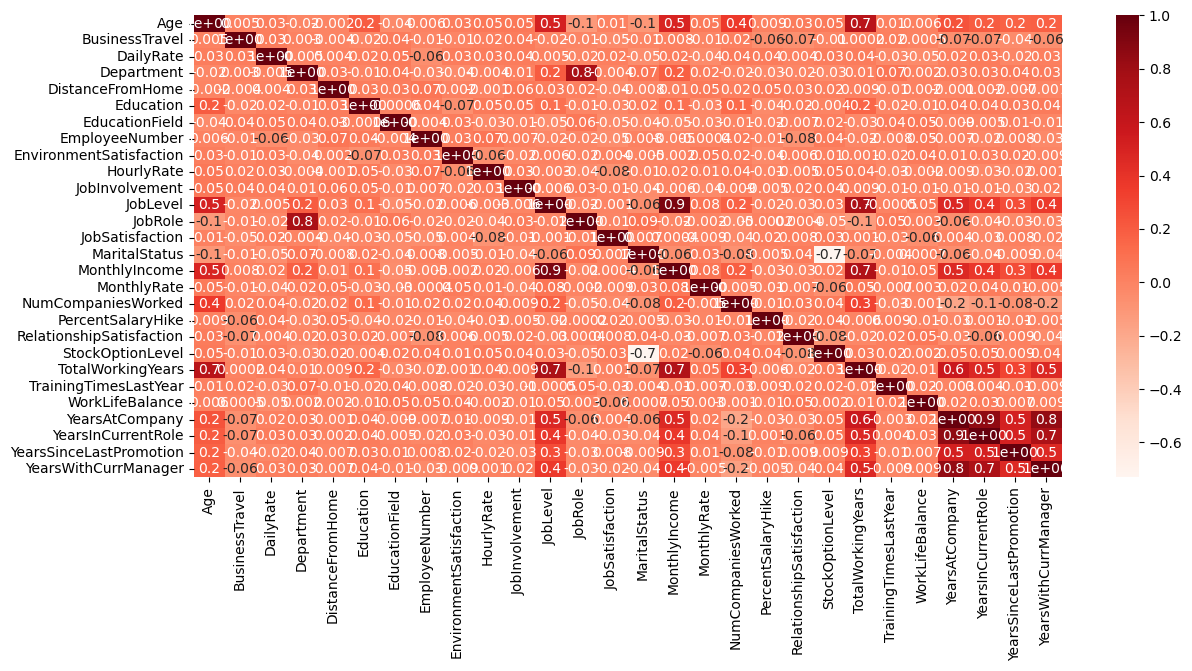

In [128]:
apply_correlation(X_train)

High correlations were observed among time-related variables:

Age, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager are strongly positively related.

JobLevel shows moderate positive correlation with MonthlyIncome and TotalWorkingYears — consistent with career progression.

Most other variables (e.g., DailyRate, DistanceFromHome, PercentSalaryHike, WorkLifeBalance) show weak or no correlation with others.

Some negative correlations exist (e.g., MaritalStatus vs StockOptionLevel), but they appear minor or dataset-specific.

Overall, multicollinearity mainly affects tenure-related features, while satisfaction and personal attributes remain largely independent.

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.3 Decision Tree (Embedded Method)** </font></a>

In [129]:
def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(10,10))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [130]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importance = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importance, 'DT')

    # Print feature importance
    print("Feature Importance:")
    print(feature_importance.sort_values(ascending=False))

In [133]:
def select_best_features_dt(X, y):
        # check which features to use using decision Tree
        apply_dt(X_train, y_train)

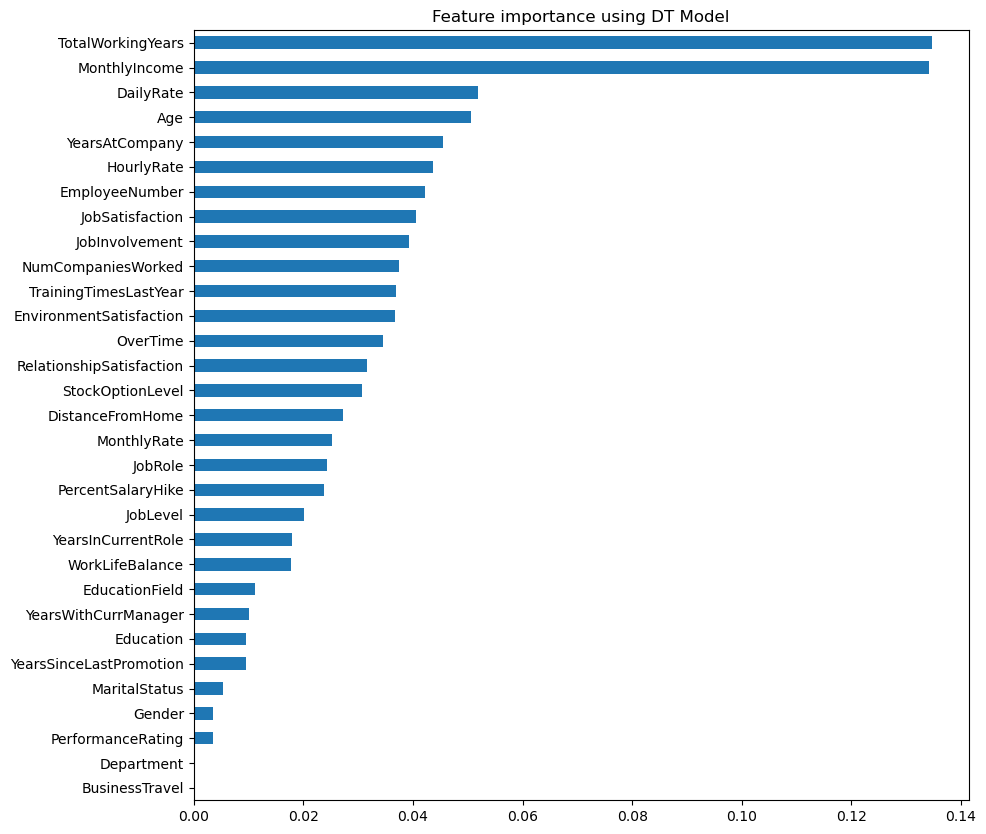

Feature Importance:
TotalWorkingYears           0.134643
MonthlyIncome               0.134185
DailyRate                   0.051878
Age                         0.050663
YearsAtCompany              0.045498
HourlyRate                  0.043638
EmployeeNumber              0.042244
JobSatisfaction             0.040564
JobInvolvement              0.039282
NumCompaniesWorked          0.037450
TrainingTimesLastYear       0.036904
EnvironmentSatisfaction     0.036661
OverTime                    0.034527
RelationshipSatisfaction    0.031569
StockOptionLevel            0.030657
DistanceFromHome            0.027267
MonthlyRate                 0.025187
JobRole                     0.024403
PercentSalaryHike           0.023715
JobLevel                    0.020228
YearsInCurrentRole          0.017957
WorkLifeBalance             0.017767
EducationField              0.011253
YearsWithCurrManager        0.010136
Education                   0.009577
YearsSinceLastPromotion     0.009577
MaritalStatus     

In [134]:
select_best_features_dt(X, y)

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.4 Recursive Feature Elimintaion RFE (Wrapper Method)** </font></a>

In [138]:
def apply_rfe(X_train , y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 10)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

apply_rfe(X_train, y_train)

Age                          True
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement               True
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked           True
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole           True
YearsSinceLast

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.2.5 Lasso - For continuous and ordinal data** </font></a>

In [139]:
lasso_clf = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10],        # valores de C 
    penalty='l1',                 # L1 = Lasso
    solver='liblinear',          # necessary for L1
    cv=5,                         # 5-fold cross-validation
    random_state=0,
    max_iter=1000
)
columns_to_drop = [
    'TotalWorkingYears',   # correlated with Age
    'YearsAtCompany',      # correlated with Age
    'YearsInCurrentRole',  # correlated with Age
    'YearsWithCurrManager',# correlated with Age
    'MonthlyIncome'        # correlated JobLevel
    ]
X_train_s_cat = X_train.drop(columns=columns_to_drop, errors='ignore').copy()

lasso_clf.fit(X_train_s_cat, y_train)

# Best C
print("Melhor valor de C:", lasso_clf.C_[0])

# Coeficients
coef = lasso_clf.coef_[0]

# Selected Features (coef ≠ 0)
selected_indices = np.where(coef != 0)[0]
selected_features = X_train_s_cat.columns[selected_indices] if hasattr(X_train_s_cat, 'columns') else selected_indices

print("Selected Features:", selected_features)

Melhor valor de C: 1.0
Selected Features: Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsSinceLastPromotion'],
      dtype='object')


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
## **5.3 Best Features** </font></a>

ESTÁ MAL

| Variable                    | Chi-square | Decision Tree | RFE   | Lasso  | Spearman/Cramer | Variance Filter | "Keep" Count | Final Decision         |
|-----------------------------|------------|---------------|-------|--------|----------------|----------------|--------------|----------------------|
| Age                         | -          | Keep          | Remove | Remove | Keep           | Keep           | 3/6          | Keep                  |
| BusinessTravel              | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| DailyRate                   | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| Department                  | Keep       | Keep          | Keep   | -      | Keep           | Keep           | 5/6          | Keep                  |
| DistanceFromHome            | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| Education                   | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| EducationField              | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| EmployeeCount               | -          | Remove        | Remove | Remove | Remove         | Remove         | 0/6          | Remove                |
| EmployeeNumber              | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| EnvironmentSatisfaction     | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| Gender                      | Keep       | Remove        | Remove | Remove | Remove         | Keep           | 2/6          | Remove                |
| HourlyRate                  | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| JobInvolvement              | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| JobLevel                    | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| JobRole                     | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| JobSatisfaction             | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| MaritalStatus               | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| MonthlyIncome               | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| MonthlyRate                 | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| NumCompaniesWorked          | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| Over18                      | -          | Remove        | Remove | Remove | Remove         | Remove         | 0/6          | Remove                |
| OverTime                    | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| PercentSalaryHike           | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| PerformanceRating           | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| RelationshipSatisfaction    | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| StandardHours               | -          | Remove        | Remove | Remove | Remove         | Remove         | 0/6          | Remove                |
| StockOptionLevel            | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| TotalWorkingYears           | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| TrainingTimesLastYear       | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| WorkLifeBalance             | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| YearsAtCompany              | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| YearsInCurrentRole          | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| YearsSinceLastPromotion     | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |
| YearsWithCurrManager        | -          | Keep          | Keep   | Keep   | Keep           | Keep           | 6/6          | Keep                  |


<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **6. Modeling (Algorithms)** </font></a>

<a class="anchor" id="2nd-bullet">


<font color = '#2f4bd6ff'>
    
# **7. Clusters** </font></a>

| Category | Variables | Why They’re Useful |
|-----------|------------|--------------------|
| **Compensation** | MonthlyIncome, DailyRate, HourlyRate, PercentSalaryHike | Test if pay or raise differences impact attrition |
| **Career** | JobLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager | See if experience or promotion stagnation affects turnover |
| **Work patterns** | TrainingTimesLastYear, WorkLifeBalance, DistanceFromHome | See if lifestyle/work-life imbalance affects attrition |
| **Demographics** | Age, Education | Explore if certain age/education groups are more likely to leave |


### NOTAS
-- Não tinhamos feito o split do dataset, portanto tive que acrescentar o split do dataset em validação/ teste e treino
-- Para evitar data leakage, tive de alterar as visualizações, encoding ...
-- Podemos fazer os graficos separados e fazer pequenas conclusões